<a href="https://colab.research.google.com/github/AkarshaJain/MachineLearningProjects/blob/main/DataAnalysisPortfolio_BookSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akarsha","key":"84c7cfdfsfferfgergertgrtg096955e5f"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  9 18:38 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data              Extrovert vs. Introvert Behavior Data                     15392  2025-05-21 04:26:52.443000          11956        282  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025           Global AI Job Market & Salary Trends 2025                529004  2025-06-01 07:20:49.537000           3654         58  0.9411765        
adilshamim8/social-media-addiction-vs-relationships               Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000          14040        204  1.0

In [ ]:
! kaggle datasets download -d thedevastator/books-sales-and-ratings

Dataset URL: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings
License(s): other
  0% 0.00/53.2k [00:00<?, ?B/s]
100% 53.2k/53.2k [00:00<00:00, 89.9MB/s]


In [ ]:
# Step 1: Unzip the file
!unzip -o books-sales-and-ratings.zip

# Step 2: Check what CSV files were extracted
import os

# Optionally list all CSV files in all folders
csv_path = ""
for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            print("Found CSV:", csv_path)

# Step 3: Load the dataset
import pandas as pd

if csv_path:
    df = pd.read_csv(csv_path)
    print("\n✅ CSV Loaded Successfully!\n")
    print(df.head())
else:
    print("❌ CSV file not found.")


Archive:  books-sales-and-ratings.zip
  inflating: Books_Data_Clean.csv    
Found CSV: ./Books_Data_Clean.csv
Found CSV: ./sample_data/california_housing_test.csv
Found CSV: ./sample_data/mnist_test.csv
Found CSV: ./sample_data/mnist_train_small.csv
Found CSV: ./sample_data/california_housing_train.csv

✅ CSV Loaded Successfully!

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0  

In [ ]:
df = pd.read_csv("Books_Data_Clean.csv")

In [ ]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
df = df[df["Publishing Year"]>1900]

In [ ]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,47
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [ ]:
df.dropna(subset=["Book Name"], inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


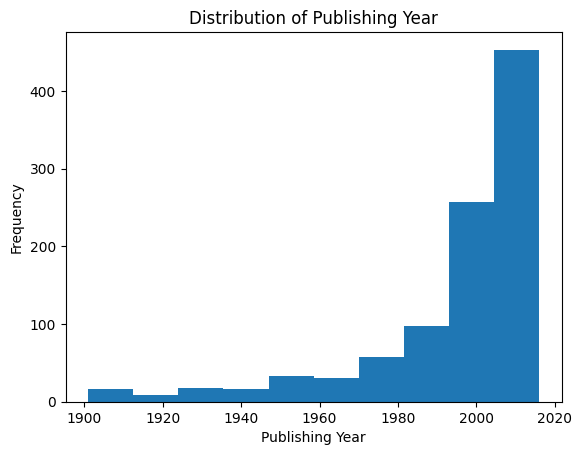

In [ ]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

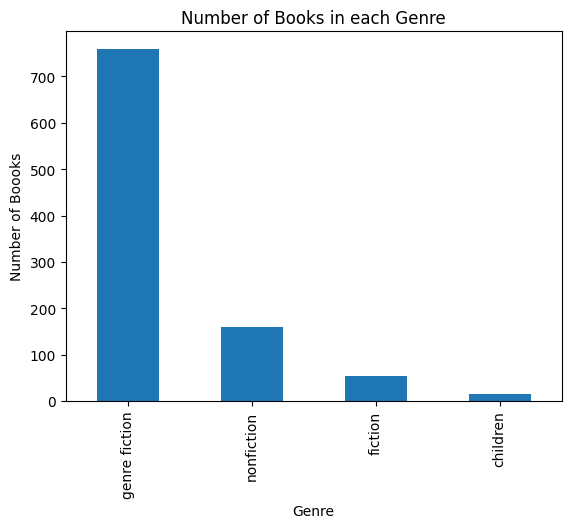

In [ ]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Boooks")
plt.title("Number of Books in each Genre")
plt.show()

In [ ]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


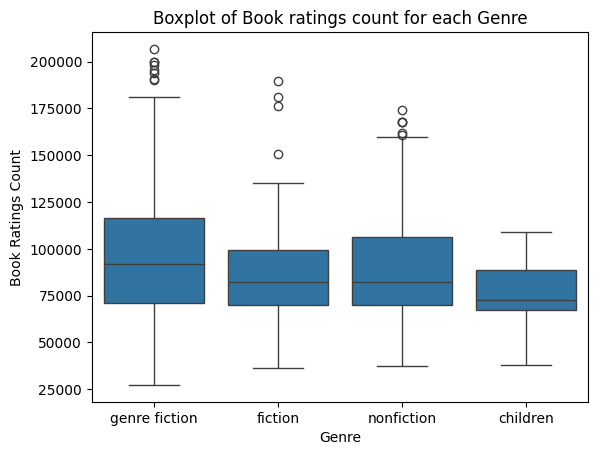

In [ ]:
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Boxplot of Book ratings count for each Genre")
plt.show()

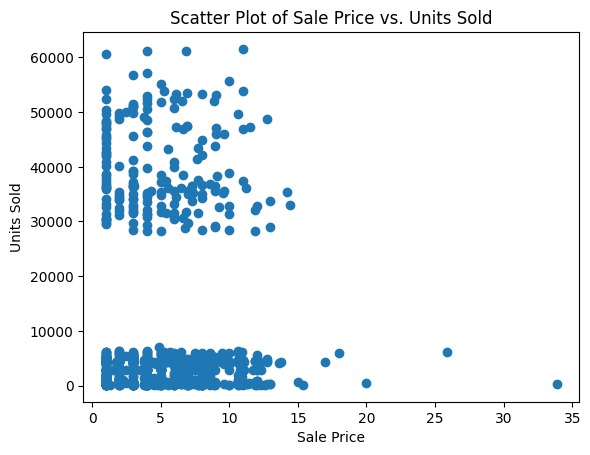

In [ ]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price vs. Units Sold")
plt.show()

In [48]:
df["language_code"].value_counts().sort_values(ascending=True)

,count
language_code,
nl,1
spa,2
ara,2
fre,4
en-CA,7
en-GB,29
en-US,226
eng,670


In [42]:
language_counts = df["language_code"].value_counts()

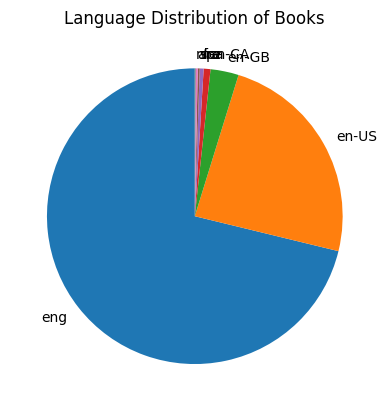

In [49]:
plt.pie(language_counts, labels=language_counts.index, startangle=90)
plt.title('Language Distribution of Books')
plt.show()

In [50]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [52]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False).max()

101400.27256944444

In [54]:
df.groupby("language_code").size().sort_values(ascending=False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


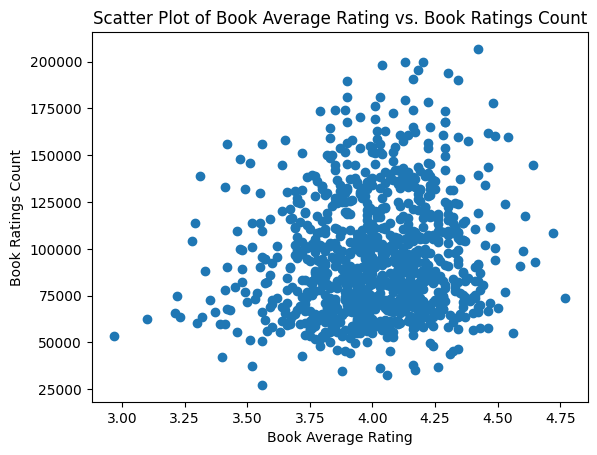

In [55]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter Plot of Book Average Rating vs. Book Ratings Count")
plt.show()

In [56]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

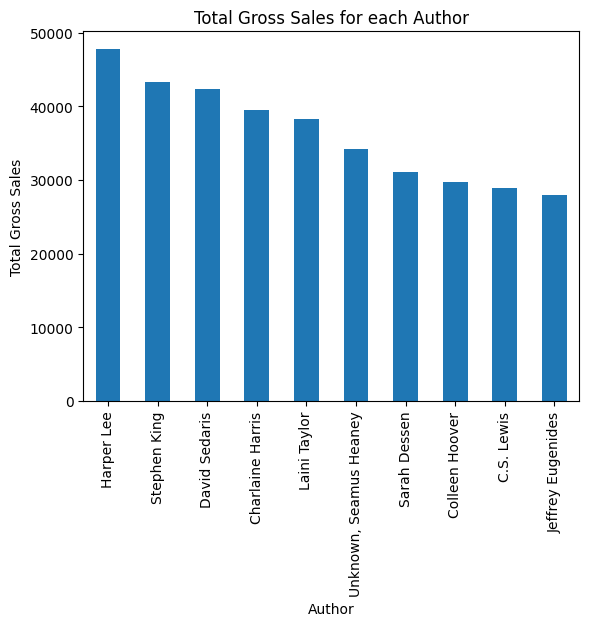

In [58]:
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for each Author")
plt.show()

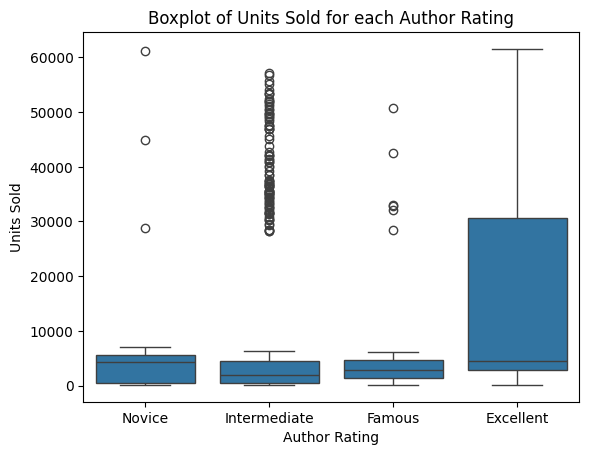

In [59]:
sns.boxplot(x="Author_Rating", y="units sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Boxplot of Units Sold for each Author Rating")
plt.show()

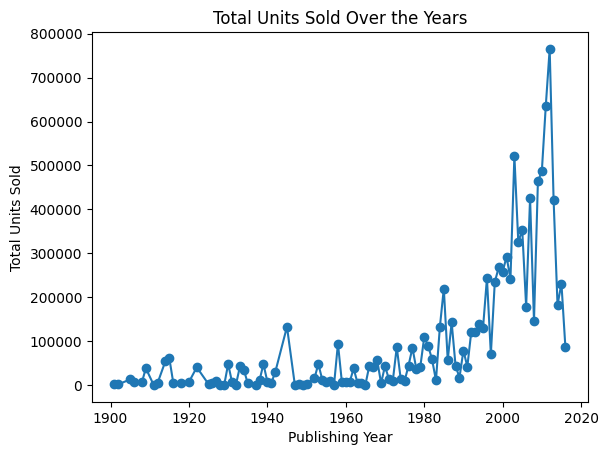

In [60]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over the Years")
plt.show()